<h1 style="text-align:center"><b>Data Analysis Project</b></h1>

<center>

### Members of Group Beta

Aditya Wahyu Wijonarko

Chandra Driastama

Hamzah Mulyana

Galuh Anjarweni

</center>

# **Instructions**
___
## About the Company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo tracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

>💡 **Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike.

## Business Context

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

> **Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders**. Although the pricing flexibility helps Cyclistic attract more customers, Moreno, the director of marketing, believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

## Business Task

Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends. Moreno has set a clear goal: _**Design marketing strategies aimed at converting casual riders into annual members**_. In order to do that, however, the marketing analyst team needs to better understand:

1. How annual members and casual riders differ?
2. Why casual riders would buy a membership?
3. How digital media could affect their marketing tactics?

## Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members.

The key stakeholders in this project are:

- **Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
- **Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
- **Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

## Available Data

You will use Cyclistic’s historical trip data to analyze and identify trends. This is public data that you can use to explore how different customer types are using Cyclistic bikes. The data has been made available by Motivate International Inc. under this **[license](https://ride.divvybikes.com/data-license-agreement),** you can download the data [**here**](https://divvy-tripdata.s3.amazonaws.com/index.html).

<center>

<table>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>ride_id</td>
    <td>The identification number for ride from start station to end station in given time.</td>
  </tr>
  <tr>
    <td>rideable_type</td>
    <td>Cyclistic company bike type, there are 3 bike type classic bike, docked bike, and electric bike.</td>
  </tr>
  <tr>
    <td>started_at</td>
    <td>Date and time when the ride begin.</td>
  </tr>
  <tr>
    <td>ended_at</td>
    <td>Date and time when the ride end.</td>
  </tr>
  <tr>
    <td>start_station_name</td>
    <td>The name of the station where the ride begin.</td>
  </tr>
  <tr>
    <td>start_station_id</td>
    <td>The id of start station.</td>
  </tr>
  <tr>
    <td>end_station_name</td>
    <td>The name of the station where the ride end.</td>
  </tr>
  <tr>
    <td>end_station_id</td>
    <td>The id of end station.</td>
  </tr>
  <tr>
    <td>start_lat</td>
    <td>Latitude of the start station.</td>
  </tr>
  <tr>
    <td>start_lng</td>
    <td>Longitude of the start station.</td>
  </tr>
  <tr>
    <td>end_lat</td>
    <td>Latitude of the end station.</td>
  </tr>
  <tr>
    <td>end_lng</td>
    <td>Longitude of the end station.</td>
  </tr>
  <tr>
    <td>member_casual</td>
    <td>The riders type in Cyclistic company.</td>
  </tr>
</table>


</center>

Import Data Library

In [1]:
#Import Library

import pandas as pd #Untuk Dataframe
import numpy as np #Untuk Dataframe
import time #Untuk Waktu
import seaborn as sns #Untuk Visualisasi
import matplotlib.pyplot as plt #Untuk visualisasi
import geopy.distance as dis #Untuk menghitung jarak
import folium #Untuk Visualisasi Map
from geopy.geocoders import Nominatim #Untuk visualisasi map
from geopy.exc import GeocoderTimedOut, GeocoderServiceError #Untuk visualisasi map

Import Data

In [2]:
#Mengimport Data Jan 2023
df1 = pd.read_csv('../data/202301-divvy-tripdata.csv')

#Mengimport Data Feb 2023
df2 = pd.read_csv('../data/202302-divvy-tripdata.csv')

#Mengimport Data Mar 2023
df3 = pd.read_csv('../data/202303-divvy-tripdata.csv')

In [4]:
#Menggabungkan data menjadi 1
df = pd.concat([df1, df2, df3], ignore_index=True)

#Menampilkan 5 data teratas
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [5]:
#Mengetahui dimensi dari data
df1_shape = df1.shape
df2_shape = df2.shape
df3_shape = df3.shape
df_shape = df.shape
print(f'''
- Shape of df1: {df1_shape}
- Shape of df2: {df2_shape}
- Shape of df3: {df3_shape}
- Shape of concatenated DataFrames: {df_shape}''')


- Shape of df1: (190301, 13)
- Shape of df2: (190445, 13)
- Shape of df3: (258678, 13)
- Shape of concatenated DataFrames: (639424, 13)


General Description of Data

In [6]:
#Menampilkan jumlah baris dan kolom dari dataset
print(f'Jumlah baris dan kolom: {df.shape}')

#Memberikan penilaian awal terhadap dataset
pd.DataFrame({
    'Type': df.dtypes,
    'N/A (%)': df.isna().mean() * 100,
    'Unique': df.nunique(),
    'Sample': [df[col].unique() for col in df.columns]
})

Jumlah baris dan kolom: (639424, 13)


,Type,N/A (%),Unique,Sample
ride_id,object,0.000000,639424,"[F96D5A74A3E41399, 13CB7EB698CEDB88, BD88A2E67..."
rideable_type,object,0.000000,3,"[electric_bike, classic_bike, docked_bike]"
started_at,object,0.000000,594512,"[2023-01-21 20:05:42, 2023-01-10 15:37:36, 202..."
ended_at,object,0.000000,595322,"[2023-01-21 20:16:33, 2023-01-10 15:46:05, 202..."
start_station_name,object,13.778651,1102,"[Lincoln Ave & Fullerton Ave, Kimbark Ave & 53..."
start_station_id,object,13.799294,1066,"[TA1309000058, TA1309000037, RP-005, TA1309000..."
end_station_name,object,14.546842,1120,"[Hampden Ct & Diversey Ave, Greenwood Ave & 47..."
end_station_id,object,14.568893,1082,"[202480.0, TA1308000002, 599, RP-001, KA150400..."
start_lat,float64,0.000000,196578,"[41.924073935, 41.799568, 42.008571, 41.926068..."
start_lng,float64,0.000000,194605,"[-87.646278381, -87.594747, -87.69048283333333..."


# Data Cleaning

- Delete Unused Columns
- Cheking Duplicate Data
- Cheking Missing Value
- Cheking Data Types

- Delete Unused Columns

In [7]:
#Menghapus kolom yang tidak digunakan
df.drop(columns=['ride_id', 'start_station_id', 'end_station_id'], inplace=True)

- Cheking Duplicate Data

In [8]:
#Mengecek Data yang duplikat
df.duplicated().sum()

#Terdapat data duplikat, hapus data duplikat
df.drop_duplicates(keep='first', inplace=True)

- Cheking Mising Value

In [9]:
# check missing values
missingValues = (df.isna().mean() * 100).to_frame().rename(columns={'index':'columns', 0:'percent'})
missingValues['count'] = df.isna().sum()
missingValues['percent'] = round(missingValues['percent'], 2).astype('str') + '%'
missingValues = missingValues.reset_index(names='column')
missingValues

,column,percent,count
0,rideable_type,0.0%,0
1,started_at,0.0%,0
2,ended_at,0.0%,0
3,start_station_name,13.78%,88104
4,end_station_name,14.55%,93016
5,start_lat,0.0%,0
6,start_lng,0.0%,0
7,end_lat,0.07%,426
8,end_lng,0.07%,426
9,member_casual,0.0%,0


In [10]:
#Mengecek kolom start_statin_name yang memiliki mising value
df[df['start_station_name'].isna()].sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
260210,electric_bike,2023-02-07 16:38:12,2023-02-07 16:40:01,NaN,NaN,41.90,-87.62,41.890000,-87.620000,member
415606,electric_bike,2023-03-15 16:46:12,2023-03-15 17:01:42,NaN,Clark St & Wrightwood Ave,41.89,-87.63,41.929546,-87.643118,member
443170,electric_bike,2023-03-28 17:01:00,2023-03-28 17:15:49,NaN,Christiana Ave & Lawrence Ave,41.98,-87.67,41.968354,-87.711831,member
353700,electric_bike,2023-02-15 13:42:15,2023-02-15 13:45:06,NaN,Seeley Ave & Roscoe St,41.94,-87.69,41.943403,-87.679618,member
601417,electric_bike,2023-03-07 20:59:25,2023-03-07 21:05:59,NaN,Southport Ave & Wellington Ave,41.93,-87.64,41.935775,-87.663600,member


<span style='color:red'><b>Note:</b></span> One possible solution for resolving the missing values in the start_station_name is by using latitude and longitude information. The latitude and longitude can pinpoint a certain location. For example, using start_lat and start_lng to get the start_station_name.

Fill in the NaN value in the start_station_name column

In [11]:
#Membuat data frame baru untuk dijadikan media sebagai mengisi kolom start_station_id yang kosong
df_start = df[['start_station_name', 'start_lat']]

#Menghapus kolom duplikat untuk dijadikan dict
df_start.drop_duplicates(subset='start_station_name', keep='first', inplace=True)

#Menghapus kolom yang kosong karena value sudah ada
df_start.dropna(inplace=True)

#Menjadikan dataframe menjadi dict
df_start_dict = df_start.set_index('start_lat')['start_station_name'].to_dict()

#Mengisi nilai nan pada kolom start_station_id dengan berdasarkan pada dict yang sudah dibuat
df['start_station_name'] = df['start_station_name'].fillna(df['start_lat'].map(df_start_dict))

#Mengisi manual karena tidak nilai lat di dict tidak ada
df['start_station_name'] = df['start_station_name'].fillna('Public Rack - Sacramento Ave & Devon Ave')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\3303947473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start.drop_duplicates(subset='start_station_name', keep='first', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\3303947473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start.dropna(inplace=True)


Fill in the NaN value in the end_station_name column

In [12]:
#Membuat data frame baru untuk dijadikan media sebagai mengisi kolom start_station_id yang kosong
df_end = df[['end_station_name', 'end_lat']]

#Menghapus kolom duplikat untuk dijadikan dict
df_end.drop_duplicates(subset='end_station_name', keep='first', inplace=True)

#Menghapus kolom yang kosong karena value sudah ada
df_end.dropna(inplace=True)

#Menjadikan dataframe menjadi dict
df_end_dict = df_end.set_index('end_lat')['end_station_name'].to_dict()

#Mengisi nilai nan pada kolom start_station_id dengan berdasarkan pada dict yang sudah dibuat
df['end_station_name'] = df['end_station_name'].fillna(df['end_lat'].map(df_end_dict))

#Mengisi manual karena tidak nilai lat di dict tidak ada
df['start_station_name'] = df['start_station_name'].fillna('Public Rack - Sacramento Ave & Devon Ave')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\1929984513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end.drop_duplicates(subset='end_station_name', keep='first', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\1929984513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end.dropna(inplace=True)


Drop columns that don't have information to fill them

In [13]:
#Menghapus kolom NaN karena tidak memiliki informasi untuk mengisi nilai tersebut
df.dropna(inplace=True, axis=0)

In [14]:
#Menampilkan data yang yang memiliki start_lat 42.0
df[df['start_lat'] == 42.0].sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
243243,electric_bike,2023-02-05 19:27:22,2023-02-05 19:45:39,Public Rack - Sacramento Ave & Devon Ave,Broadway & Granville Ave,42.0,-87.66,41.994780,-87.660285,member
228918,electric_bike,2023-02-15 16:10:34,2023-02-15 16:13:23,Public Rack - Sacramento Ave & Devon Ave,Public Rack - Washtenaw Ave & Devon Ave,42.0,-87.66,42.000000,-87.660000,member
85227,electric_bike,2023-01-19 22:21:07,2023-01-19 22:50:11,Public Rack - Sacramento Ave & Devon Ave,Public Rack - Kedzie Ave & Chicago Ave,42.0,-87.66,41.900000,-87.630000,member
535825,electric_bike,2023-03-23 17:03:07,2023-03-23 17:09:01,Public Rack - Sacramento Ave & Devon Ave,Maplewood Ave & Peterson Ave,42.0,-87.69,41.990236,-87.693370,member
269992,electric_bike,2023-02-05 17:19:01,2023-02-05 17:23:11,Public Rack - Sacramento Ave & Devon Ave,Sheridan Rd & Columbia Ave,42.0,-87.67,42.004583,-87.661406,member


<span style='color:red'><b>Note:</b></span> There are several start_station_name and end_station_name that have the same start_lat, start_lng, and end_lat, end_lng but have different names. Therefore, it should be adjusted so that if start_lat and start_lng have the same values but start_station_name has multiple different values, then the start_station_name with the highest frequency of occurrence will replace the other values. The same applies to end_station_name as well.

Replacing the value of start_station_name if start_lat and start_lng are the same with the value that has the highest count.

In [15]:
# Buat kolom gabungan untuk koordinat
df['koordinat'] = list(zip(df.start_lat, df.start_lng))

# Hitung jumlah kemunculan tiap kota pada masing-masing koordinat
count_df_start = df.groupby(['koordinat', 'start_station_name']).size().reset_index(name='count')

# Cari kota dengan jumlah kemunculan terbanyak untuk masing-masing koordinat
max_count_df_start = count_df_start.loc[count_df_start.groupby('koordinat')['count'].idxmax()]

# Buat dictionary untuk menyimpan kota yang paling sering muncul di setiap koordinat
koordinat_to_start_stationn = dict(zip(max_count_df_start['koordinat'], max_count_df_start['start_station_name']))

# Gunakan fungsi map untuk mengubah nama_kota berdasarkan dictionary yang telah dibuat
df['start_station_name'] = df['koordinat'].map(koordinat_to_start_stationn)

# Hapus kolom koordinat
df.drop(columns=['koordinat'], inplace=True)

Replacing the value of end_station_name if end_lat and end_lng are the same with the value that has the highest count.

In [16]:
# Buat kolom gabungan untuk koordinat
df['koordinat'] = list(zip(df.end_lat, df.end_lng))

# Hitung jumlah kemunculan tiap kota pada masing-masing koordinat
count_df_end = df.groupby(['koordinat', 'end_station_name']).size().reset_index(name='count')

# Cari kota dengan jumlah kemunculan terbanyak untuk masing-masing koordinat
max_count_df_end = count_df_end.loc[count_df_end.groupby('koordinat')['count'].idxmax()]

# Buat dictionary untuk menyimpan kota yang paling sering muncul di setiap koordinat
koordinat_to_start_stationn = dict(zip(max_count_df_end['koordinat'], max_count_df_end['end_station_name']))

# Gunakan fungsi map untuk mengubah nama_kota berdasarkan dictionary yang telah dibuat
df['end_station_name'] = df['koordinat'].map(koordinat_to_start_stationn)

# Hapus kolom koordinat
df.drop(columns=['koordinat'], inplace=True)

- Cheking Data Types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637488 entries, 0 to 639423
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       637488 non-null  object 
 1   started_at          637488 non-null  object 
 2   ended_at            637488 non-null  object 
 3   start_station_name  637488 non-null  object 
 4   end_station_name    637488 non-null  object 
 5   start_lat           637488 non-null  float64
 6   start_lng           637488 non-null  float64
 7   end_lat             637488 non-null  float64
 8   end_lng             637488 non-null  float64
 9   member_casual       637488 non-null  object 
dtypes: float64(4), object(6)
memory usage: 53.5+ MB


The started_at and ended_at are supposed to be datetime, not objects so they need to be converted into datetime.

In [18]:
#mengubah tipe data pada start dan end time menjadi datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

### Data Preprocessing

In [19]:
#Membuat fungsi untuk menghitung jarak
def distance(x):
    start = (x['start_lat'], x['start_lng'])
    end = (x['end_lat'], x['end_lng'])

    return int(dis.geodesic(start, end).meters)

#Membuat kolom baru yang merupakan hitungan jarak
df['distances'] = df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].apply(func=distance, axis=1)

In [20]:
#Membuat kolom baru untuk menentukan seberapa durasi pemakaian (second)
df['duration_seconds'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

#Membuat kolom baru untuk menentukan seberapa durasi pemakaian (minute)
df['duration_minutes'] = ((df['ended_at'] - df['started_at']).dt.total_seconds()/60).astype(int)

#Membuat kolom start_hour
df['start_hour'] = df['started_at'].dt.hour

#Membuat kolom baru berdasarkan bersepeda di jam sibuk atau tidak
df['hour_category'] = df['started_at'].dt.hour.apply(lambda x: 'Busy Hour' if 7 <= x <= 9 or 16 <= x <= 18 else 'Non Busy Hour')

#Membuat kolom hari untuk satu minggu
df['day_of_week'] = df['started_at'].dt.day_name()

#Membuat kategori weekday and weekend
df['day_category'] = df['day_of_week'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday')

#Membuat kolom baru bernama bulan yang diambil dari kolom start_time, untuk melihat trend dari bulan 1 - 3
df['month'] = df['started_at'].dt.month

In [21]:
#Membuat dict untuk harga setiap jenis sepeda
tarif = {
    ('classic_bike', 'member'): 0.18,
    ('classic_bike', 'casual'): 0.18,
    ('docked_bike', 'member'): 0.29,
    ('docked_bike', 'casual'): 0.44,
    ('electric_bike', 'member'): 0.18,
    ('electric_bike', 'casual'): 0.44,
}

#Membuat kolom charge($)
df['charges'] = df.apply(lambda df: tarif[(df['rideable_type'], df['member_casual'])] * (df['duration_minutes']), axis=1)

#Menampilkan 5 data teratas
df.head(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,distances,duration_seconds,duration_minutes,start_hour,hour_category,day_of_week,day_category,month,charges
0,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Oak Park & Wellington,41.924074,-87.646278,41.930000,-87.640000,member,839,651.0,10,20,Non Busy Hour,Saturday,Weekend,1,1.80
1,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,1203,509.0,8,15,Non Busy Hour,Tuesday,Weekday,1,1.44
2,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,42.008571,-87.690483,42.039742,-87.699413,casual,3540,794.0,13,7,Busy Hour,Monday,Weekday,1,5.72
3,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,1203,526.0,8,10,Non Busy Hour,Sunday,Weekend,1,1.44
4,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,1203,919.0,15,13,Non Busy Hour,Thursday,Weekday,1,2.70


In [22]:
#Mengecek kembali mengenai missing value dan tipe data
#Menampilkan jumlah baris dan kolom dari dataset
print(f'Jumlah baris dan kolom: {df.shape}')

#Memberikan penilaian awal terhadap dataset
pd.DataFrame({
    'Type': df.dtypes,
    'N/A (%)': df.isna().mean() * 100,
    'Unique': df.nunique(),
    'Sample': [df[col].unique() for col in df.columns]
})

Jumlah baris dan kolom: (637488, 19)


,Type,N/A (%),Unique,Sample
rideable_type,object,0.0,3,"[electric_bike, classic_bike, docked_bike]"
started_at,datetime64[ns],0.0,592809,"[2023-01-21T20:05:42.000000000, 2023-01-10T15:..."
ended_at,datetime64[ns],0.0,593614,"[2023-01-21T20:16:33.000000000, 2023-01-10T15:..."
start_station_name,object,0.0,773,"[Lincoln Ave & Fullerton Ave, Kimbark Ave & 53..."
end_station_name,object,0.0,757,"[Oak Park & Wellington, Greenwood Ave & 47th S..."
start_lat,float64,0.0,195996,"[41.924073935, 41.799568, 42.008571, 41.926068..."
start_lng,float64,0.0,194043,"[-87.646278381, -87.594747, -87.69048283333333..."
end_lat,float64,0.0,965,"[41.93, 41.809835, 42.039742, 42.001785, 41.99..."
end_lng,float64,0.0,961,"[-87.64, -87.599383, -87.699413, -87.688829, -..."
member_casual,object,0.0,2,"[member, casual]"


<span style='color:red'><b>Note:</b></span> Data is correct and ready to be used

# Exploratory Data Analysis

## Question 1: How annual members and casual riders differ?

- How many riders are in each membership?

In [23]:
#Mengelompokan dataframe berdasarkan member type
counts_members = df['member_casual'].value_counts().reset_index()
counts_members['percent'] = (counts_members['member_casual']/counts_members['member_casual'].sum() * 100).round(2)
counts_members

,index,member_casual,percent
0,member,493051,77.34
1,casual,144437,22.66


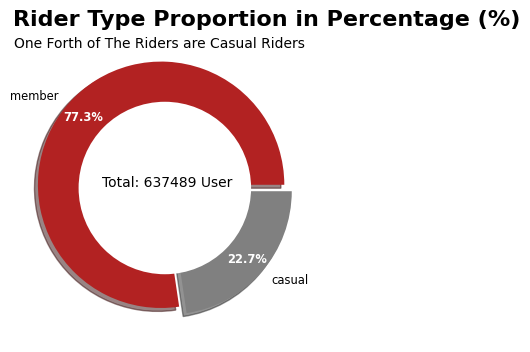

In [24]:
#Mengatur kanvas
plt.figure(figsize=(8, 4))

#Membuat Pie Chart
wedges, texts, autotexts = plt.pie(
    x=counts_members.percent,
    labels=counts_members['index'],
    colors=['firebrick', 'grey'],
    autopct='%1.1f%%', 
    pctdistance=0.84, 
    explode=(0.04, 0.04),
    shadow=True,
    textprops={"color": "black", 'fontsize': 8.3}
)

#Membuat lingkaran putih ditengah pie chart
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig.gca().add_artist(centre_circle)

#Membuat text berupa persentase
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#Membuat text ditengah pie chart
plt.text(0.02, 0.04, 'Total: 637489 User', va='center', ha='center', backgroundcolor='white', fontdict={'fontsize': 10})

#Membuat judul dan sub judul
plt.title("Rider Type Proportion in Percentage (%)", fontsize=16, fontweight='bold', x=0.007, y=1.0, loc='left')
plt.suptitle("One Forth of The Riders are Casual Riders", fontsize=10, x=0.506, y=0.873)

#Menampilkan Pie chart
plt.show()

- What time do annual members and casual riders usually use the service?

In [25]:
#Membuat data frame yang berisikan hanya data yang membership saja
df_member = df[df['member_casual']== 'member']

#Mengatur day_of_week dimulai pada hari senin
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_member['day_of_week'] = pd.Categorical(df_member['day_of_week'], categories=days_of_week_order, ordered=True)

#Membuat visualisasi heatmap
heatmap_df_member = df_member.pivot_table(index='start_hour', columns='day_of_week', aggfunc='size', fill_value=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\288148808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member['day_of_week'] = pd.Categorical(df_member['day_of_week'], categories=days_of_week_order, ordered=True)


In [27]:
#Menampilan data secara tabel
heatmap_df_member

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_hour,,,,,,,
0,378,346,342,468,424,750,1040
1,195,166,176,180,264,485,773
2,131,139,108,122,154,251,543
3,86,72,76,74,101,129,248
4,187,231,186,178,164,99,150
5,781,1099,1124,918,812,190,203
6,2497,3586,3349,3039,2311,559,529
7,4359,6765,6622,5796,3958,1078,1043
8,5391,8569,8031,7170,4755,1838,1498


In [28]:
#Membuat data frame yang berisikan hanya data yang membership saja
df_casual = df[df['member_casual']== 'casual']

#Mengatur day_of_week dimulai pada hari senin
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_casual['day_of_week'] = pd.Categorical(df_casual['day_of_week'], categories=days_of_week_order, ordered=True)

#Membuat visualisasi heatmap
heatmap_df_casual = df_casual.pivot_table(index='start_hour', columns='day_of_week', aggfunc='size', fill_value=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\36687391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casual['day_of_week'] = pd.Categorical(df_casual['day_of_week'], categories=days_of_week_order, ordered=True)


In [29]:
#Menampilkan data secara tabel
heatmap_df_casual

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_hour,,,,,,,
0,203,170,161,220,233,396,630
1,120,63,107,126,133,317,525
2,84,65,68,102,92,177,420
3,44,49,69,66,66,100,149
4,79,69,85,61,61,59,104
5,189,219,237,194,158,75,93
6,400,633,570,554,427,129,178
7,645,1149,1188,988,690,278,264
8,827,1423,1354,1253,743,460,399


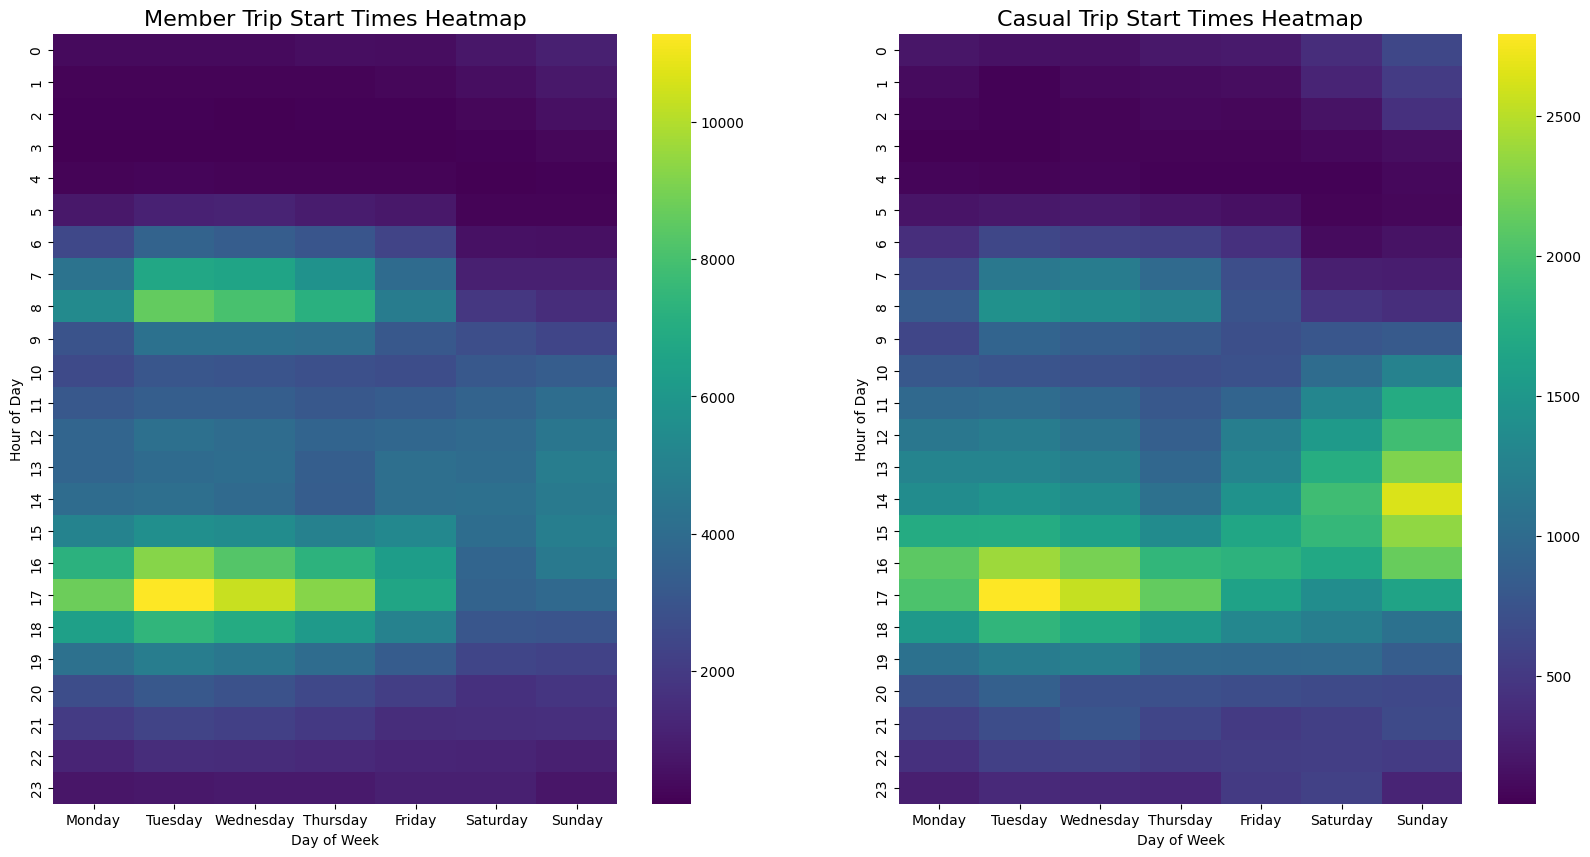

In [30]:
#Mengatur banyaknya axes dalam satu kanvas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))     

#Membuat grafik untuk tiap axes
sns.heatmap(heatmap_df_member, cmap='viridis', ax=axes[0]) #Membuat heatmap untuk member
axes[0].set_title('Member Trip Start Times Heatmap', fontsize=16)
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')

sns.heatmap(heatmap_df_casual, cmap='viridis', ax=axes[1]) #Membuuat heatmap untuk casual
axes[1].set_title('Casual Trip Start Times Heatmap', fontsize=16)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Hour of Day')


# menampilkan grafik
plt.show()

- Bicycle Usage Trends in each Membership

In [31]:
#Mengelompokan data
trend_month = df.groupby(['month', 'member_casual']).agg(func={'member_casual':'count'}).reset_index(names=['month', 'user_type'])

#Mengganti nama kolom agar sesuai
trend_month.rename(columns={'user_type':'member_casual', 'member_casual':'count'}, inplace=True)

#Mengubah value pada kolom month
trend_month['month'] = trend_month['month'].apply(lambda x: 'January' if x == 1 else 'February' if x == 2 else 'March')

#Memperlihatkan data
trend_month

,month,member_casual,count
0,January,casual,39757
1,January,member,149859
2,February,casual,42784
3,February,member,147047
4,March,casual,61896
5,March,member,196145


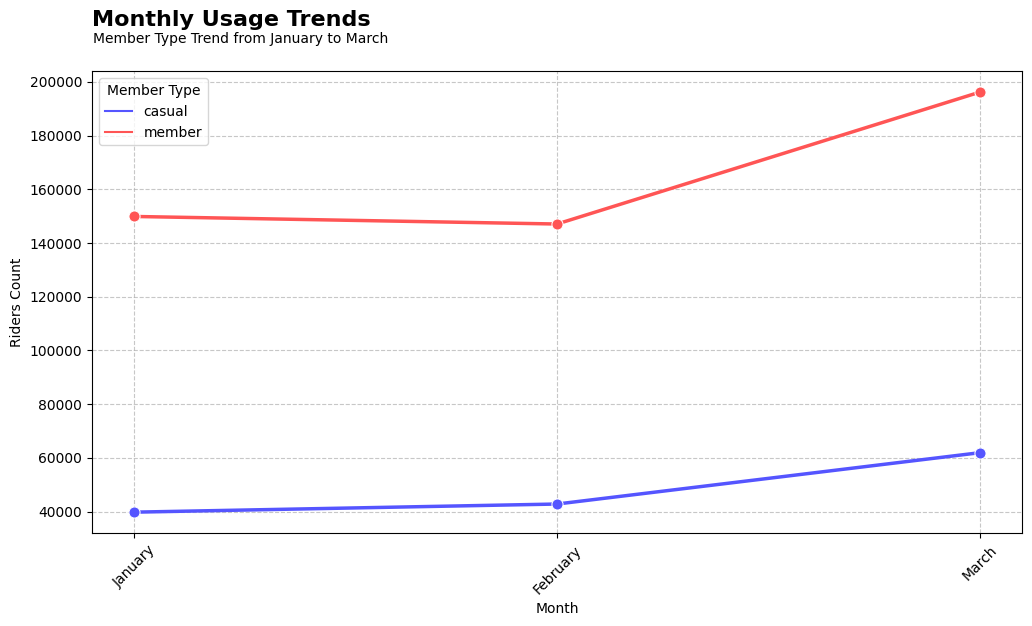

In [32]:
#Menentukan ukuran kanvas
plt.figure(figsize=(12, 6))

#Membuat linechart
sns.lineplot(data=trend_month, x='month', y='count', hue='member_casual', marker='o', palette='seismic',
             linewidth=2.5, markersize=8)

#Menambahkan grid dan mengatur tampilan sumbu
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Memutar label sumbu x
plt.legend(title='Member Type')

#Membuat judul, subjudul, label x, dan label y
plt.title('Monthly Usage Trends', loc='left', fontsize=16, fontweight='bold', y=1.08)
plt.suptitle("Member Type Trend from January to March", fontsize=10, x=0.249, y=0.945)
plt.xlabel('Month')
plt.ylabel('Riders Count')

#Menampilkan grafik
plt.show()

- Type of bicycle used for each user

In [33]:
#Mengelompokan data berdasarkan tipe sepeda dan tipe member
member_bike_type = df.groupby(['rideable_type', 'member_casual']).agg(func=
                                                                      {'member_casual':'count'}).reset_index(names=
                                                                                                             ['rideable_type', 'membership']).rename(columns={'member_casual':'count'})
member_bike_type

,rideable_type,membership,count
0,classic_bike,casual,48725
1,classic_bike,member,238289
2,docked_bike,casual,6777
3,electric_bike,casual,88935
4,electric_bike,member,254762


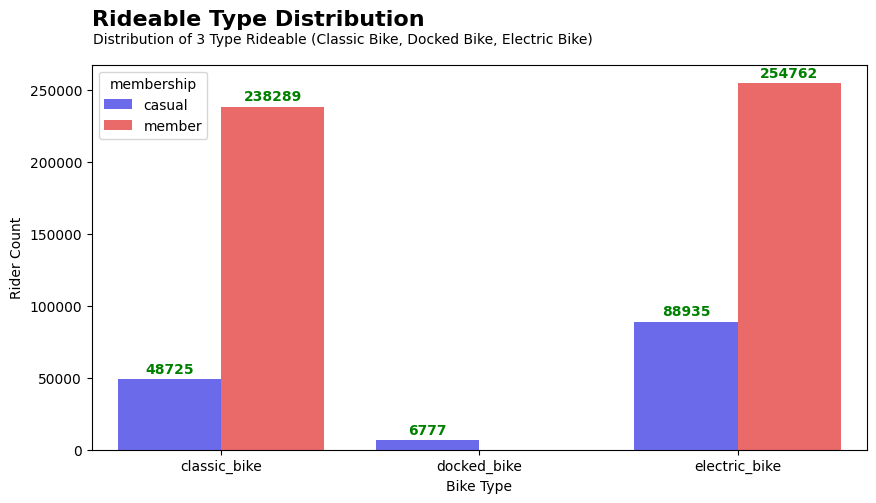

In [34]:
#Menentukan ukuran kanvas
plt.figure(figsize=(10,5))

#Membuat barchart
ax = sns.barplot(data=member_bike_type, x='rideable_type', y='count', hue='membership', palette='seismic')

#Menambahkan angka di atas bar dengan pengaturan warna dan ketebalan
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='green', weight='bold')

#Membuat judul, subjudul, x label, dan y label
plt.title('Rideable Type Distribution', fontsize=16, fontweight='bold', y=1.08, loc='left')
plt.suptitle("Distribution of 3 Type Rideable (Classic Bike, Docked Bike, Electric Bike)", fontsize=10, x=0.376, y=0.945)
plt.xlabel('Bike Type')
plt.ylabel('Rider Count')

#Menampilkan Grafik
plt.show()

- Length of User Duration for Each Type of Rider

In [35]:
#Melihat data apakah sudah sesuai
df['duration_minutes'].describe().round(3)

count    637488.000
mean         10.855
std          27.179
min          -3.000
25%           4.000
50%           7.000
75%          12.000
max        1499.000
Name: duration_minutes, dtype: float64

**Note:** Cheking out the negative value in duration(m)

In [36]:
#Mengecek duration_minutes yang kurang dari 0
df[df['duration_minutes'] < 0]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,distances,duration_seconds,duration_minutes,start_hour,hour_category,day_of_week,day_category,month,charges
379648,electric_bike,2023-02-04 13:08:08,2023-02-04 13:04:52,Elizabeth St & Randolph St,Dearborn St & Monroe St,41.88,-87.63,41.88132,-87.629521,member,151,-196.0,-3,13,Non Busy Hour,Saturday,Weekend,2,-0.54


<span style='color:red'><b>Note:</b></span> 
There is only 1 so just drop the value

In [37]:
#Menhapus baris yang duration(m) < 0
df = df.drop(df[df['duration_minutes'] < 0].index)

In [38]:
#Mengelompokan data berdasarkan tipe member
membership_duration = df.groupby('member_casual').agg(func={'duration_minutes':'mean'}).reset_index()
membership_duration

,member_casual,duration_minutes
0,casual,14.506761
1,member,9.784908


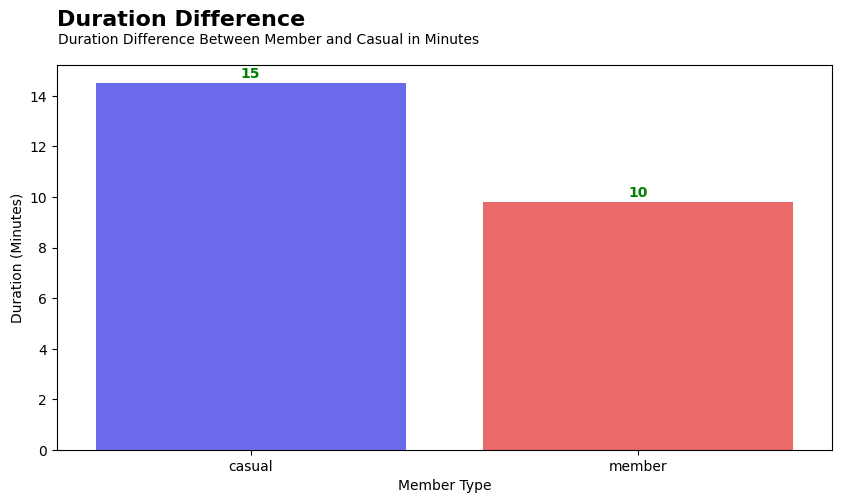

In [39]:
#Menentukan ukuran kanvas
plt.figure(figsize=(10,5))

#Membuat barchart
ax = sns.barplot(data=membership_duration, x='member_casual', y='duration_minutes', palette='seismic')

#Menambahkan angka di atas bar dengan pengaturan warna dan ketebalan
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='green', weight='bold')

#Membuat judul, subjudul, x label, dan y label
plt.title('Duration Difference', fontsize=16, fontweight='bold', y=1.08, loc='left')
plt.suptitle("Duration Difference Between Member and Casual in Minutes", fontsize=10, x=0.337, y=0.945)
plt.xlabel('Member Type')
plt.ylabel('Duration (Minutes)')

#Menampilkan grafik
plt.show()

- How are Station locations based on membership

In [40]:
#Membuat dataframe yang isinya 10 start_station_name yang banyak dikunjungi untuk casual
top_station_casual_start = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().reset_index(name='count').head(10)

#Membuat dataframe yang isinya 10 start_station_name yang banyak dikunjungi untuk member
top_station_member_start = df[df['member_casual'] == 'member']['start_station_name'].value_counts().reset_index(name='count').head(10)

#Membuat dataframe yang isinya 10 end_station_name yang banyak dikunjungi untuk casual
top_station_casual_end = df[df['member_casual'] == 'casual']['end_station_name'].value_counts().reset_index(name='count').head(10)

#Membuat dataframe yang isinya 10 end_station_name yang banyak dikunjungi untuk member
top_station_member_end = df[df['member_casual'] == 'member']['end_station_name'].value_counts().reset_index(name='count').head(10)

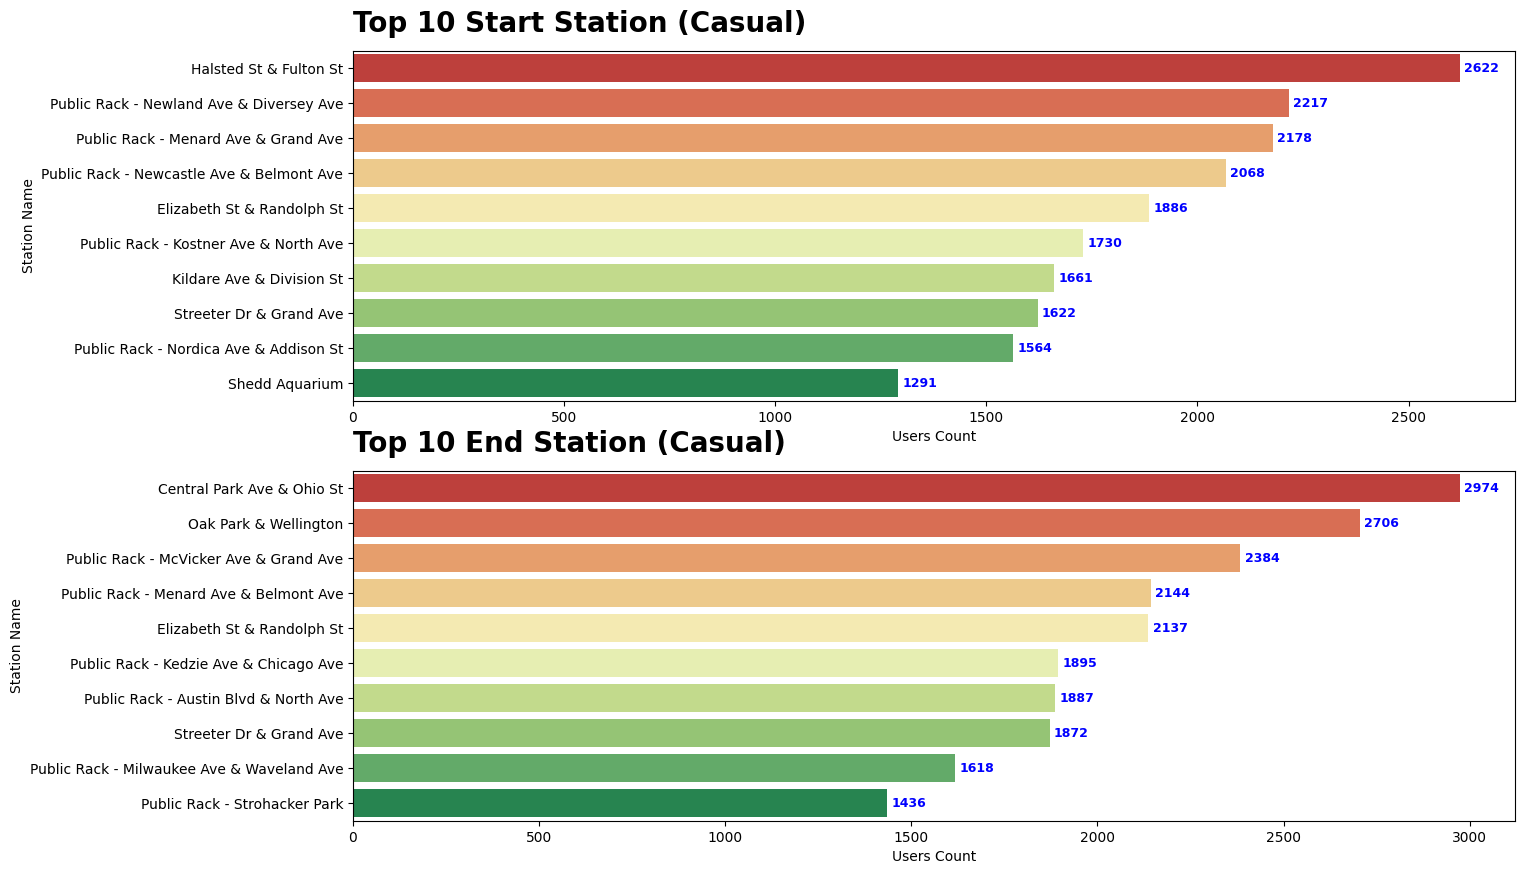

In [41]:
#Mengatur banyak axes dalam satu figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))     

#Membuat grafik untuk tiap axes
#Membuat barplot untuk casual start_station_name
casual_start = sns.barplot(data=top_station_casual_start, x='count', y='index', ax=axes[0], palette='RdYlGn')

#Menambahkan angka di atas bar untuk subplot pertama
for container in casual_start.containers:
    casual_start.bar_label(container, fmt='%.0f', label_type='edge', padding=3, color='blue', weight='bold', fontsize=9)

#Menentukan judul, x label, dan y label untuk casual start_station
axes[0].set_title('Top 10 Start Station (Casual)', fontsize=20, loc='left', fontweight='bold', y=1.03)
axes[0].set_xlabel('Users Count')
axes[0].set_ylabel('Station Name')

#Membuat barplot untuk casual end_station_name
casual_end = sns.barplot(data=top_station_casual_end, x='count', y='index', ax=axes[1], palette='RdYlGn')

#Menambahkan angka di atas bar untuk subplot pertama
for container in casual_end.containers:
    casual_end.bar_label(container, fmt='%.0f', label_type='edge', padding=3, color='blue', weight='bold', fontsize=9)

#Menentukan judul, x label, dan y label untuk casual end_station
axes[1].set_title('Top 10 End Station (Casual)', fontsize=20, loc='left', fontweight='bold', y=1.03)
axes[1].set_xlabel('Users Count')
axes[1].set_ylabel('Station Name')

#Menampilkan grafik
plt.show()

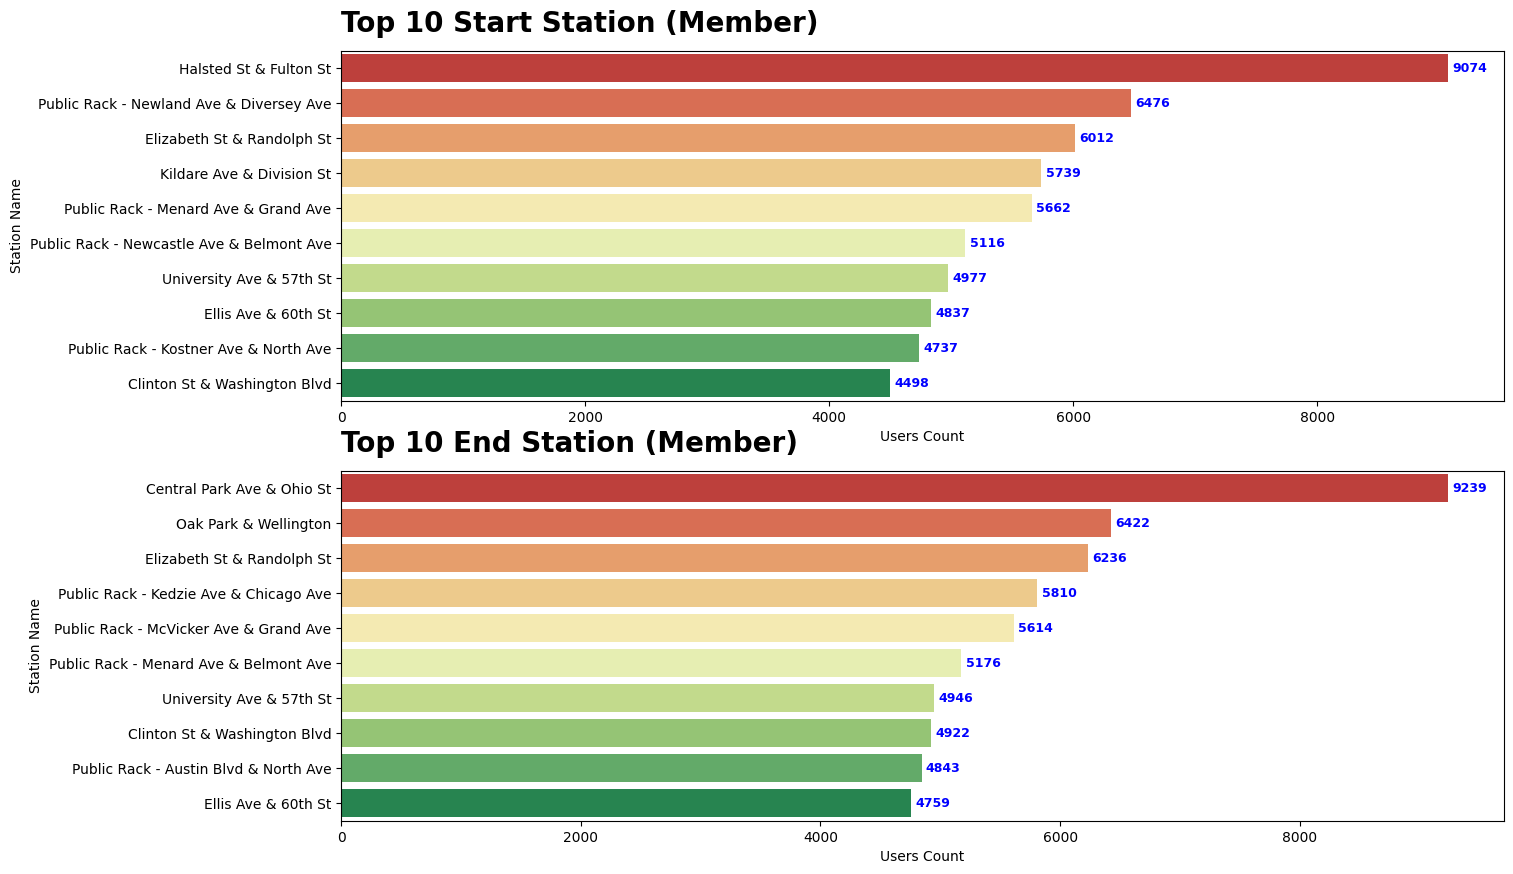

In [42]:
#Mengatur banyak axes dalam satu figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))     

#Membuat grafik untuk tiap axes
#Membuat barplot untuk member start_station_name
member_start = sns.barplot(data=top_station_member_start, x='count', y='index', ax=axes[0], palette='RdYlGn')

#Menambahkan angka di atas bar untuk subplot pertama
for container in member_start.containers:
    member_start.bar_label(container, fmt='%.0f', label_type='edge', padding=3, color='blue', weight='bold', fontsize=9)

#Menentukan judul, x label, dan y label untuk member start_station
axes[0].set_title('Top 10 Start Station (Member)', fontsize=20, loc='left', fontweight='bold', y=1.03)
axes[0].set_xlabel('Users Count')
axes[0].set_ylabel('Station Name')

#Membuat barplot untuk member end_station_name
member_end = sns.barplot(data=top_station_member_end, x='count', y='index', ax=axes[1], palette='RdYlGn')

#Menambahkan angka di atas bar untuk subplot pertama
for container in member_end.containers:
    member_end.bar_label(container, fmt='%.0f', label_type='edge', padding=3, color='blue', weight='bold', fontsize=9)

#Menentukan judul, x label, dan y label untuk member end_station
axes[1].set_title('Top 10 End Station (Member)', fontsize=20, loc='left', fontweight='bold', y=1.03)
axes[1].set_xlabel('Users Count')
axes[1].set_ylabel('Station Name')

#Menampilkan grafik
plt.show()

## Question 2: Why casual riders would buy a membership?

- How Much is the Pricing for Each Membership

In [43]:
#Mengelompokan data berdasarkan member tipe dan day of week
avg_pricing = df.groupby(['member_casual', 'day_of_week'])['charges'].mean().reset_index()

#Mengatur day of week diurutkan mulai dari senin (monday)
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_pricing['day_of_week'] = pd.Categorical(avg_pricing['day_of_week'], categories=days_of_week_order, ordered=True)

#Menampilkan dataframe
avg_pricing

,member_casual,day_of_week,charges
0,casual,Friday,4.457983
1,casual,Monday,4.513798
2,casual,Saturday,5.230740
3,casual,Sunday,5.976298
4,casual,Thursday,4.056599
5,casual,Tuesday,4.338046
6,casual,Wednesday,4.240249
7,member,Friday,1.717467
8,member,Monday,1.701057
9,member,Saturday,1.929913


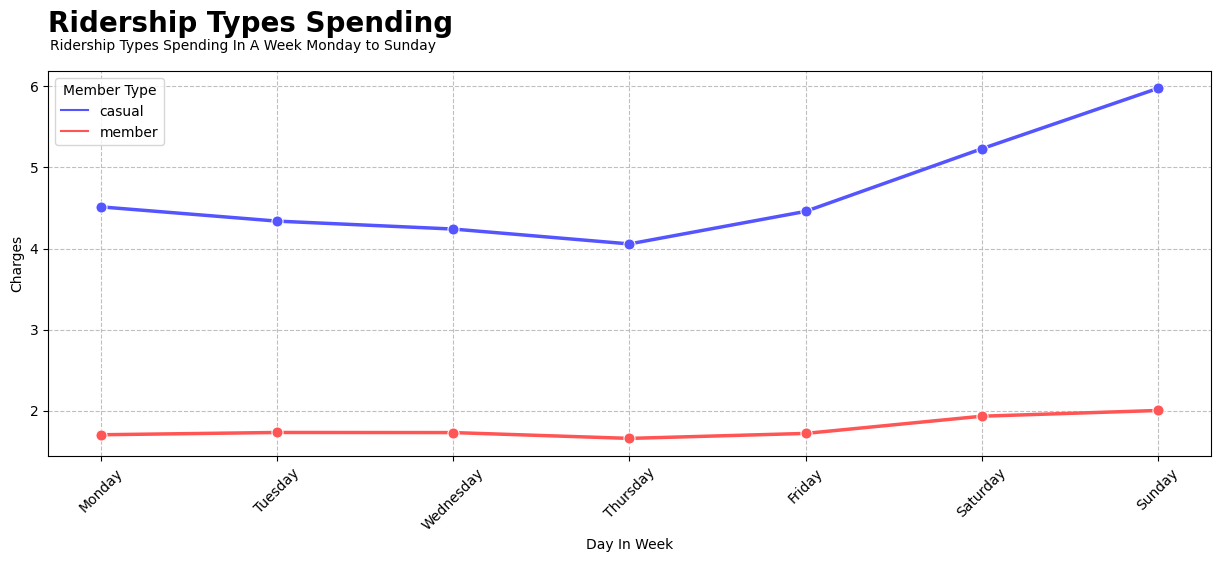

In [44]:
#Menentukan ukuran kanvas
plt.figure(figsize=(15, 5))

#Membuat linechart
sns.lineplot(data=avg_pricing, x=avg_pricing.day_of_week, y='charges', errorbar=None, 
             hue='member_casual', marker='o', palette='seismic', linewidth=2.5, markersize=8)

#Menambahkan grid dan mengatur tampilan sumbu
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(rotation=45)  # Memutar label sumbu x
plt.legend(title='Member Type')

#Membuat judul, subjudul, x label, dan y label
plt.title('Ridership Types Spending', loc='left', fontsize=20, fontweight='bold', y=1.08)
plt.suptitle("Ridership Types Spending In A Week Monday to Sunday", fontsize=10, x=0.255, y=0.945)
plt.xlabel('Day In Week')
plt.ylabel('Charges')

#Menampilkan grafik
plt.show()

- How much revenue from each loan on membership

In [45]:
#Mengelompokan data berdasarkan member tipe dan day of week
sum_pricing = df.groupby(['member_casual', 'day_of_week'])['charges'].sum().reset_index()

#Mengatur day of week diurutkan mulai dari senin (monday)
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sum_pricing['day_of_week'] = pd.Categorical(sum_pricing['day_of_week'], categories=days_of_week_order, ordered=True)

#Menampilkan data frame
sum_pricing

,member_casual,day_of_week,charges
0,casual,Friday,82570.76
1,casual,Monday,86601.72
2,casual,Saturday,103432.66
3,casual,Sunday,140950.98
4,casual,Thursday,76061.24
5,casual,Tuesday,99167.74
6,casual,Wednesday,92267.82
7,member,Friday,114041.52
8,member,Monday,122874.12
9,member,Saturday,94642.92


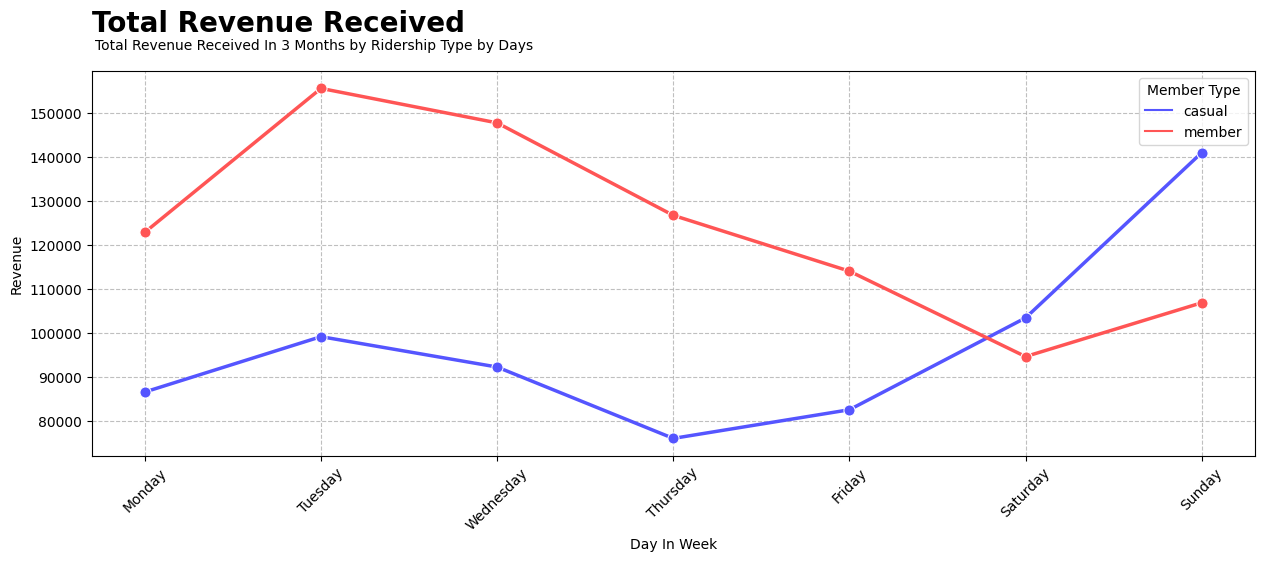

In [46]:
#Mengatur ukuran kanvas
plt.figure(figsize=(15, 5))

#Membuat linechart
sns.lineplot(data=sum_pricing, x=sum_pricing.day_of_week, y='charges', errorbar=None, 
             hue='member_casual', marker='o', palette='seismic', linewidth=2.5, markersize=8)

#Menambahkan grid dan mengatur tampilan sumbu
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(rotation=45)  # Memutar label sumbu x
plt.legend(title='Member Type')

#Membuat judul, subjudul, x label, dan y label
plt.title('Total Revenue Received', loc='left', fontsize=20, fontweight='bold', y=1.08)
plt.suptitle("Total Revenue Received In 3 Months by Ridership Type by Days", fontsize=10, x=0.273, y=0.945)
plt.xlabel('Day In Week')
plt.ylabel('Revenue')

#menampilkan grafik
plt.show()

## Question 3: How digital media could affect their marketing tactics?

- Average Ride Duration of Casual Rider is 5 Minutes Longers Than The Member. In Average Casual Rider Spend More Than The Member

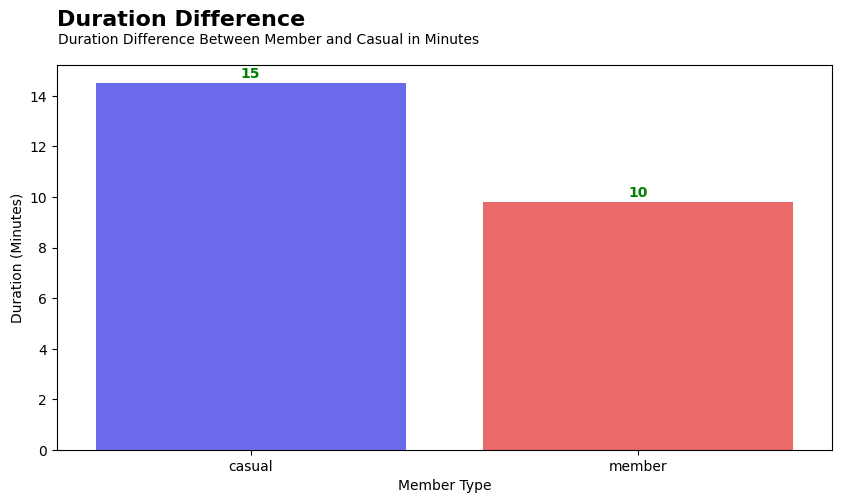

In [47]:
#Menentukan ukuran kanvas
plt.figure(figsize=(10,5))

#Membuat barchart
ax = sns.barplot(data=membership_duration, x='member_casual', y='duration_minutes', palette='seismic')

#Menambahkan angka di atas bar dengan pengaturan warna dan ketebalan
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='green', weight='bold')

#Membuat judul, subjudul, x label, dan y label
plt.title('Duration Difference', fontsize=16, fontweight='bold', y=1.08, loc='left')
plt.suptitle("Duration Difference Between Member and Casual in Minutes", fontsize=10, x=0.337, y=0.945)
plt.xlabel('Member Type')
plt.ylabel('Duration (Minutes)')

#Menampilkan grafik
plt.show()

Average Spending by Ridership Type

In [48]:
#Mengelompokan berdasarkan member type
avg_pricing_total = df.groupby(['member_casual'])['charges'].mean().reset_index()

#Menampilkan dataframe
avg_pricing_total

,member_casual,charges
0,casual,4.715225
1,member,1.761283


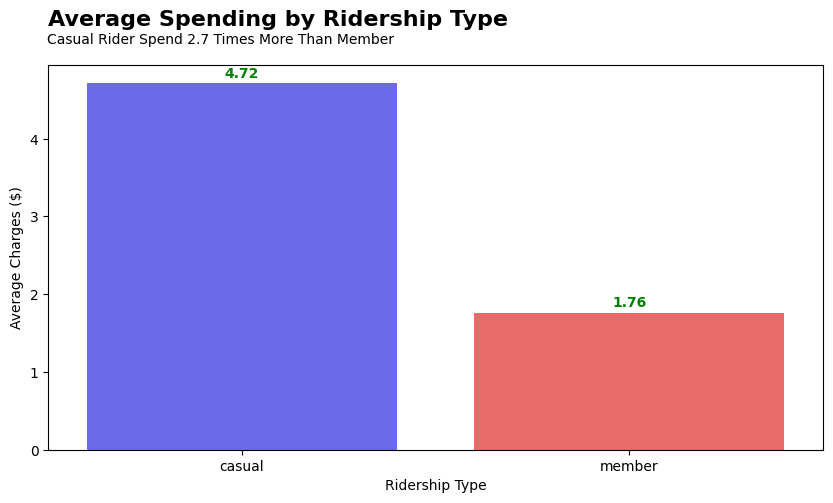

In [49]:
# Menentukan ukuran kanvas
plt.figure(figsize=(10,5))

# Membuat barchart
ax = sns.barplot(data=avg_pricing_total, x='member_casual', y='charges', palette='seismic')

# Menghitung rasio pengeluaran
ratio = avg_pricing_total['charges'][0] / avg_pricing_total['charges'][1]

# Menambahkan angka di atas bar dengan pengaturan warna dan ketebalan
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Menampilkan dua digit desimal
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # Jarak vertikal antara bar dan teks
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='green', weight='bold')

# Membuat judul, subjudul, x label, dan y label
plt.title('Average Spending by Ridership Type', fontsize=16, fontweight='bold', y=1.08, loc='left')
plt.suptitle("Casual Rider Spend 2.7 Times More Than Member", fontsize=10, x=0.297, y=0.945)
plt.xlabel('Ridership Type')
plt.ylabel('Average Charges ($)')

# Menampilkan grafik
plt.show()

**Casual Riders Spend 2.7 Times More Than Member**

- Digital Ads Recomendation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\2850791500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casual['day_of_week'] = pd.Categorical(df_casual['day_of_week'], categories=days_of_week_order, ordered=True)


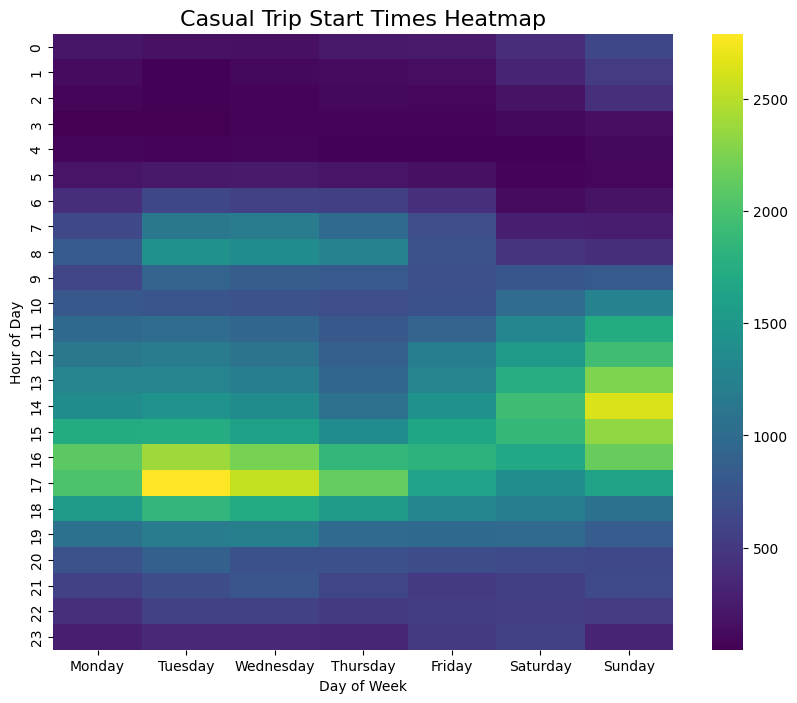

In [50]:
#Membuat data frame yang berisikan hanya data yang membership saja
df_casual = df[df['member_casual']== 'casual']

#Mengatur day_of_week dimulai pada hari senin
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_casual['day_of_week'] = pd.Categorical(df_casual['day_of_week'], categories=days_of_week_order, ordered=True)

#Membuat visualisasi heatmap
heatmap_df_casual = df_casual.pivot_table(index='start_hour', columns='day_of_week', aggfunc='size', fill_value=0)

#Membuat kanvas
plt.figure(figsize=(10,8))

#Membuat heatmap
sns.heatmap(heatmap_df_casual, cmap='viridis') #Membuuat heatmap untuk casual
plt.title('Casual Trip Start Times Heatmap', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')


# menampilkan grafik
plt.show()

**Behavioral Emails:** Target emails to casual riders depending on their riding habits. Since the casual rider often uses the service on weekends, email them weekend-specific membership incentives.

**Insights:** Give casual riders an overview of their riding habits and demonstrate how becoming a member could benefit them based on their individual usage hours

**Use time-sensitive pop-up notification:** on the application to promote membership advantages and special offers to casual riders during peak activity periods.

**Insights:** Provide incentives for casual riders to become members when they open the app during their regular riding periods.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5228\1791667503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casual['usage_time'] = (df_casual['ended_at'] - df_casual['started_at']).dt.total_seconds() / 60


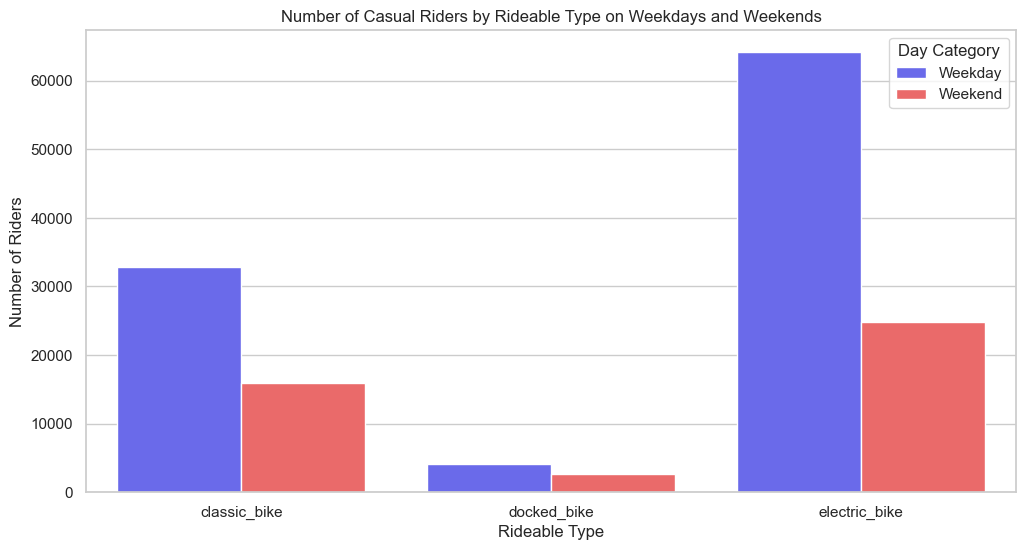

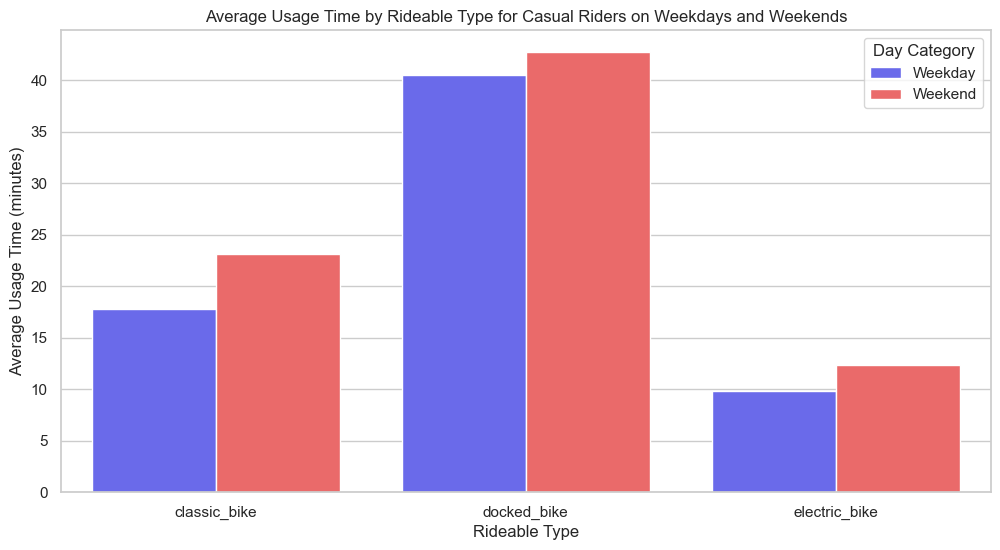

In [61]:
# Filter data for casual riders
df_casual = df[df['member_casual'] == 'casual']

# Calculate usage time in minutes
df_casual['usage_time'] = (df_casual['ended_at'] - df_casual['started_at']).dt.total_seconds() / 60

# Group by 'rideable_type' and 'day_category' and calculate average usage time
average_usage_time = df_casual.groupby(['rideable_type', 'day_category'])['usage_time'].mean().reset_index()

# Plot the number of casual riders by rideable type on weekdays and weekends
rideable_counts = df_casual.groupby(['rideable_type', 'day_category']).size().reset_index(name='counts')
rideable_pivot = rideable_counts.pivot(index='rideable_type', columns='day_category', values='counts').reset_index()
rideable_melt = pd.melt(rideable_pivot, id_vars=['rideable_type'], value_vars=['Weekday', 'Weekend'],
                        var_name='Day Category', value_name='Count')

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(data=rideable_melt, x='rideable_type', y='Count', hue='Day Category', palette='seismic')
barplot.set_title('Number of Casual Riders by Rideable Type on Weekdays and Weekends')
barplot.set_xlabel('Rideable Type')
barplot.set_ylabel('Number of Riders')
barplot.legend(title='Day Category', loc='upper right')

# Plot the average usage time by rideable type on weekdays and weekends
plt.figure(figsize=(12, 6))
usage_plot = sns.barplot(data=average_usage_time, x='rideable_type', y='usage_time', hue='day_category', palette='seismic')
usage_plot.set_title('Average Usage Time by Rideable Type for Casual Riders on Weekdays and Weekends')
usage_plot.set_xlabel('Rideable Type')
usage_plot.set_ylabel('Average Usage Time (minutes)')
usage_plot.legend(title='Day Category', loc='upper right')

plt.show()

- Electric bike dominates the majority of casual riders both on weekdays and weekend. It means that, there are more casual riders use electric bike than classic bike and docked bike.

- When we analyze deeper, the average time of electric bike is relatively low. Therefore, marketing promotions or price adjustment for electric bike might be needed to boost these riders to become members.

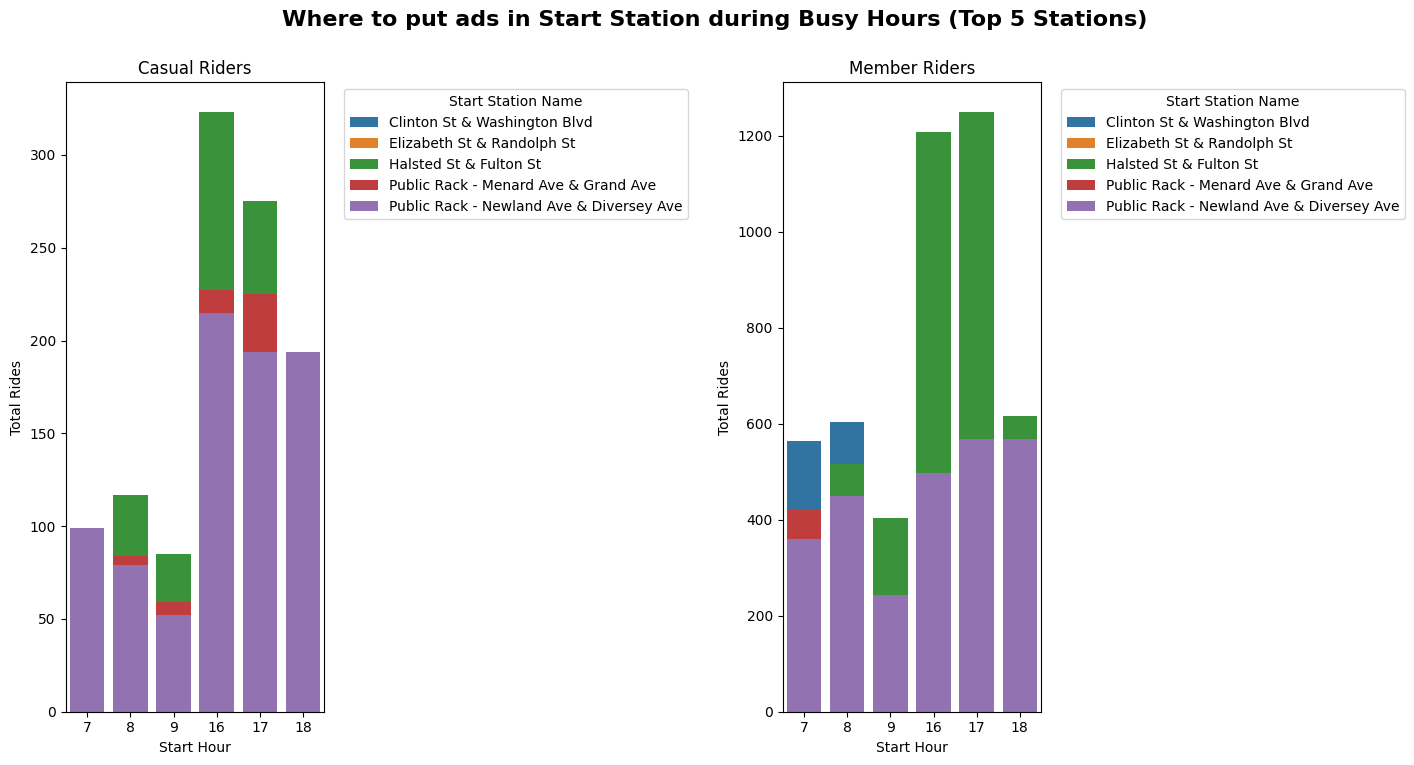

In [51]:
# Group the data by start station name to get the total number of rides during busy hours
station_busy_hour_data = df[df['hour_category'] == 'Busy Hour'].groupby(['start_station_name']).size().reset_index(name='total_rides')

# Get the top 10 start stations with the most rides during busy hours
top_stations = station_busy_hour_data.nlargest(5, 'total_rides')['start_station_name']

# Filter the main dataframe to include only the top 10 stations and busy hours
df_top_stations = df[(df['start_station_name'].isin(top_stations)) & (df['hour_category'] == 'Busy Hour')]

# Group the data by start hour, start station name, and member type to get the total number of rides
hourly_station_data = df_top_stations.groupby(['start_hour', 'start_station_name', 'member_casual']).size().reset_index(name='total_rides')

# Filter to include only busy hours
hourly_station_data = hourly_station_data[hourly_station_data['start_hour'].isin([7, 8, 9, 16, 17, 18])]

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a bar plot for casual riders
plt.subplot(1, 2, 1)
sns.barplot(x='start_hour', y='total_rides', hue='start_station_name', data=hourly_station_data[hourly_station_data['member_casual'] == 'casual'], dodge=False)
plt.title('Casual Riders')
plt.xlabel('Start Hour')
plt.ylabel('Total Rides')
plt.legend(title='Start Station Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a bar plot for subscribers
plt.subplot(1, 2, 2)
sns.barplot(x='start_hour', y='total_rides', hue='start_station_name', data=hourly_station_data[hourly_station_data['member_casual'] == 'member'], dodge=False)
plt.title('Member Riders')
plt.xlabel('Start Hour')
plt.ylabel('Total Rides')
plt.legend(title='Start Station Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the figure
plt.suptitle('Where to put ads in Start Station during Busy Hours (Top 5 Stations)', fontsize=16, y=0.95, x=0.45, fontweight='bold')

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# Show the plot
plt.show()

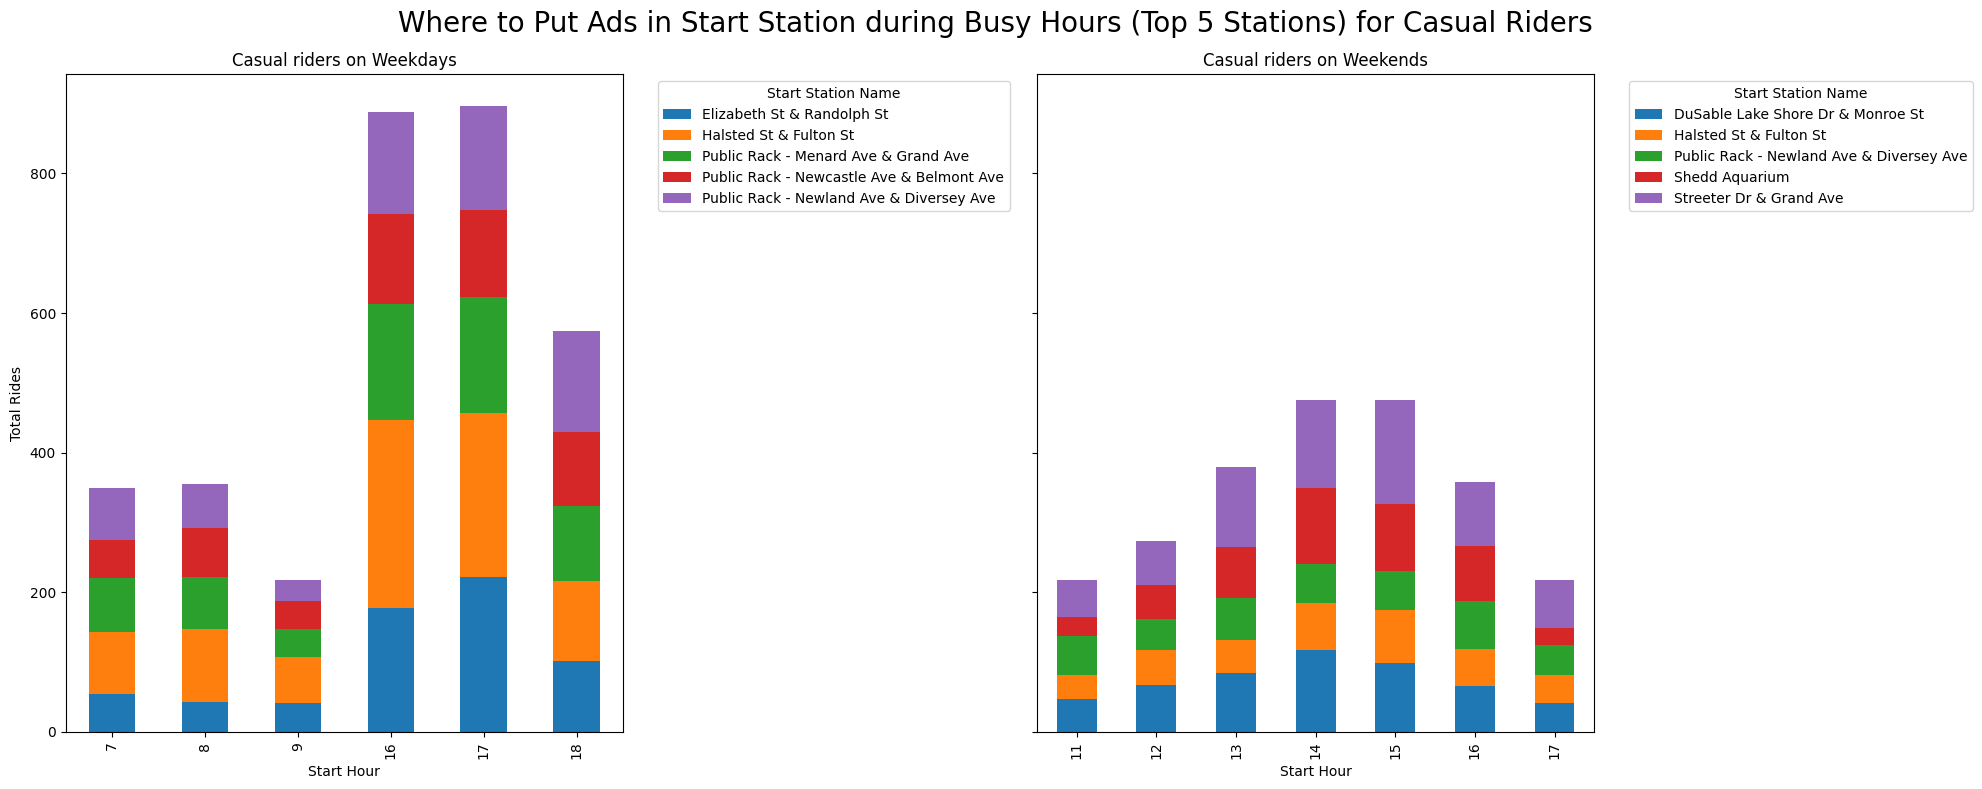

In [52]:
# Define busy hours
weekday_busy_hours = [7, 8, 9, 16, 17, 18]
weekend_busy_hours = list(range(11, 18))

# Filter for casual riders
casual_riders = df[df['member_casual'] == 'casual']

# Separate weekdays and weekends
weekday_data = casual_riders[casual_riders['day_category'] == 'Weekday']
weekend_data = casual_riders[casual_riders['day_category'] == 'Weekend']

# Filter busy hours for weekdays and weekends
weekday_busy_data = weekday_data[weekday_data['start_hour'].isin(weekday_busy_hours)]
weekend_busy_data = weekend_data[weekend_data['start_hour'].isin(weekend_busy_hours)]

# Count total rides per start station and hour
weekday_rides = weekday_busy_data.groupby(['start_station_name', 'start_hour']).size().reset_index(name='total_rides')
weekend_rides = weekend_busy_data.groupby(['start_station_name', 'start_hour']).size().reset_index(name='total_rides')

# Get top 5 stations overall for weekdays and weekends
top_5_weekday_stations = weekday_rides.groupby('start_station_name')['total_rides'].sum().nlargest(5).index
top_5_weekend_stations = weekend_rides.groupby('start_station_name')['total_rides'].sum().nlargest(5).index

# Filter data to include only top 5 stations
weekday_top_5_data = weekday_rides[weekday_rides['start_station_name'].isin(top_5_weekday_stations)]
weekend_top_5_data = weekend_rides[weekend_rides['start_station_name'].isin(top_5_weekend_stations)]

# Pivot data for stacked bar plot
weekday_pivot = weekday_top_5_data.pivot(index='start_hour', columns='start_station_name', values='total_rides').fillna(0)
weekend_pivot = weekend_top_5_data.pivot(index='start_hour', columns='start_station_name', values='total_rides').fillna(0)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Where to Put Ads in Start Station during Busy Hours (Top 5 Stations) for Casual Riders', fontsize=20)

# Weekday plot
weekday_pivot.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Casual riders on Weekdays')
axes[0].set_xlabel('Start Hour')
axes[0].set_ylabel('Total Rides')
axes[0].legend(title='Start Station Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Weekend plot
weekend_pivot.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Casual riders on Weekends')
axes[1].set_xlabel('Start Hour')
axes[1].set_ylabel('Total Rides')
axes[1].legend(title='Start Station Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [53]:
# Filter data for casual riders
df_casual = df[df['member_casual'] == 'casual']

# Define hectic hours for weekdays and weekends
weekday_hectic_hours = [7, 8, 9, 16, 17, 18]
weekend_hectic_hours = [11, 12, 13, 14, 15, 16, 17]

# Create filters
weekday_filter = (df_casual['day_category'] == 'Weekday') & (df_casual['started_at'].dt.hour.isin(weekday_hectic_hours))
weekend_filter = (df_casual['day_category'] == 'Weekend') & (df_casual['started_at'].dt.hour.isin(weekend_hectic_hours))

# Get top 5 stations for weekdays and weekends
top_weekday_stations = df_casual[weekday_filter]['start_station_name'].value_counts().nlargest(5).index
top_weekend_stations = df_casual[weekend_filter]['start_station_name'].value_counts().nlargest(5).index

# Filter data for these top stations
top_weekday_data = df_casual[df_casual['start_station_name'].isin(top_weekday_stations)]
top_weekend_data = df_casual[df_casual['start_station_name'].isin(top_weekend_stations)]

# Create a map
map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Add markers for weekday stations
for station in top_weekday_stations:
    station_data = top_weekday_data[top_weekday_data['start_station_name'] == station].iloc[0]
    folium.Marker(
        location=[station_data['start_lat'], station_data['start_lng']],
        popup=f"{station} (Weekday)",
        icon=folium.Icon(color='blue')
    ).add_to(map)

# Add markers for weekend stations
for station in top_weekend_stations:
    station_data = top_weekend_data[top_weekend_data['start_station_name'] == station].iloc[0]
    folium.Marker(
        location=[station_data['start_lat'], station_data['start_lng']],
        popup=f"{station} (Weekend)",
        icon=folium.Icon(color='green')
    ).add_to(map)

# Display the map
map

In [55]:
# Filter data for casual riders
df_casual = df[df['member_casual'] == 'casual']

# Define hectic hours for weekdays and weekends
weekday_hectic_hours = [7, 8, 9, 16, 17, 18]
weekend_hectic_hours = [11, 12, 13, 14, 15, 16, 17]

# Create filters
weekday_filter = (df_casual['day_category'] == 'Weekday') & (df_casual['started_at'].dt.hour.isin(weekday_hectic_hours))
weekend_filter = (df_casual['day_category'] == 'Weekend') & (df_casual['started_at'].dt.hour.isin(weekend_hectic_hours))

# Get top 5 stations for weekdays and weekends
top_weekday_stations = df_casual[weekday_filter]['start_station_name'].value_counts().nlargest(5).index
top_weekend_stations = df_casual[weekend_filter]['start_station_name'].value_counts().nlargest(5).index

# Filter data for these top stations
top_weekday_data = df_casual[df_casual['start_station_name'].isin(top_weekday_stations)]
top_weekend_data = df_casual[df_casual['start_station_name'].isin(top_weekend_stations)]

# Initialize geolocator
geolocator = Nominatim(user_agent="divvy_bike_analysis")

# Function to get postal code
def get_postal_code(lat, lng):
    location = geolocator.reverse((lat, lng), exactly_one=True)
    address = location.raw['address']
    postal_code = address.get('postcode', 'Postal code not found')
    return postal_code

# Collect postal codes for weekday stations
weekday_postal_codes = []
for station in top_weekday_stations:
    station_data = top_weekday_data[top_weekday_data['start_station_name'] == station].iloc[0]
    postal_code = get_postal_code(station_data['start_lat'], station_data['start_lng'])
    weekday_postal_codes.append({'Station': station, 'Postal Code': postal_code})

# Collect postal codes for weekend stations
weekend_postal_codes = []
for station in top_weekend_stations:
    station_data = top_weekend_data[top_weekend_data['start_station_name'] == station].iloc[0]
    postal_code = get_postal_code(station_data['start_lat'], station_data['start_lng'])
    weekend_postal_codes.append({'Station': station, 'Postal Code': postal_code})

# Create DataFrames
weekday_df = pd.DataFrame(weekday_postal_codes)
weekend_df = pd.DataFrame(weekend_postal_codes)

In [56]:
#Menampilan dataframe untuk casual pada weekdays beserta kode pos
weekday_df

,Station,Postal Code
0,Halsted St & Fulton St,60654
1,Elizabeth St & Randolph St,60607
2,Public Rack - Menard Ave & Grand Ave,60614
3,Public Rack - Newland Ave & Diversey Ave,60614
4,Public Rack - Newcastle Ave & Belmont Ave,60657


In [57]:
#Menampilan dataframe untuk casual pada weekend beserta kode pos
weekend_df

,Station,Postal Code
0,Streeter Dr & Grand Ave,60611
1,DuSable Lake Shore Dr & Monroe St,60603
2,Shedd Aquarium,60605
3,Public Rack - Newland Ave & Diversey Ave,60614
4,Halsted St & Fulton St,60654


**Targeted Social Media Ads**

- **Time-Targeted Ads:** Use social media platforms to run ads during the times when casual riders are most likely to be active. Highlight the benefits of membership tailored to their riding times.

- **Geo-Targeting:** Combine timing data with location data (postal code) to create hyper-targeted ads for casual riders in specific areas during their peak usage time

<h1 style='text-align:center'><i><b>---END---</b></i></h1>